# Transient 1D Heat Conduction

In [316]:
from sympy import * 
from spb import *

import numpy as np

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [182]:
smp.init_printing(pretty_print=True)

In [183]:
# starting from basically the solution ..
x, tau = symbols("X tau")
theta = symbols("θ", cls=Function)(x, tau)
theta


In [339]:
# Bi = 2
lam, A, B, Bi = symbols("lambda A B, Bi")
lam = symbols("lambda", real=True, positive=True)
lam
Bi

In [185]:
sol = exp(-lam**2*tau) * (A*cos(lam*x) + B*sin(lam*x))
gen_eq = Eq(theta, sol )
gen_eq

In [186]:
bc1_eq = Eq(gen_eq.rhs.diff(x).subs(x,0), 0)
# bc1_sol = bc1_eq
B_solve = smp.solve(bc1_eq, B)[0]
B_solve

In [187]:
gen_eq2 = Eq(theta, gen_eq.rhs.subs(B, B_solve))
gen_eq2

In [188]:
bc2_eq = Eq(gen_eq2.rhs.diff(x).subs(x,1), -Bi*gen_eq2.rhs.subs(x,1))
bc2_eq 

In [261]:
Bi_solve = smp.solve(bc2_eq, Bi, domain=smp.S.Reals)[0]
Bi_solve # has infinite values... 

## maybe more correct way to solve for A_n

In [333]:
def apply(eq, func, *args):
    return Eq(
        func(eq.lhs, *args),
        func(eq.rhs, *args)
    )

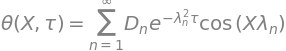

In [344]:
D_n, lambda_n = symbols("D_n, lambda_n") # EQ4orary bc not sure if can sub directly #TODO test out...
Eq(theta, 
    Sum(
        gen_eq2.rhs,
        (n, 1, oo)
    ).subs({A: D_n, lam: lambda_n})
)
    

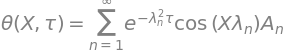

In [345]:
Aix = IndexedBase("A")

_.subs(D_n, Aix[n])

In [346]:
EQ1 = _

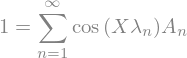

In [393]:
# theta(x,0)  = 1 

Eq(1, EQ1.rhs.subs(tau, 0))

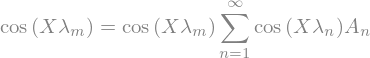

In [394]:
# orthogonal fun 
# lamix = IndexedBase("lambda")

lambda_m = symbols("lambda_m", finite=True)
# var("m", integer=True, positive=True)
apply(_, Mul, cos(x*lambda_m))

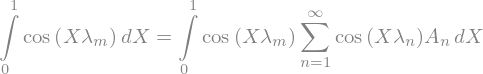

In [395]:
apply(_, Integral, (x, 0, 1))

In [396]:
EQ2 = _

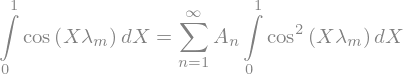

In [397]:
# rhs => swap integration and summation 

Eq(EQ2.lhs, 
    Sum(
        Aix[n] * 
        Integral(cos(lambda_m*x) * cos(lambda_m*x), (x, 0, 1)),
        (n, 1, oo)
    )
)

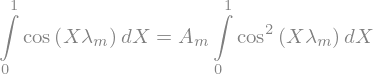

In [398]:
# change An => Am really => removed the summation and made constant .. 
# due to orthogonality property => terms vanish except for when n = m 
Eq(_.lhs, _.rhs.args[0].subs(n, m))

In [399]:
EQ3 = _

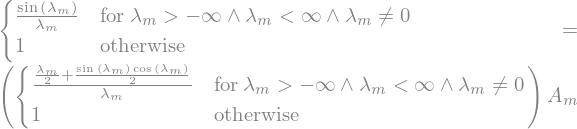

In [452]:
# eval the integral 
EQ3.doit()

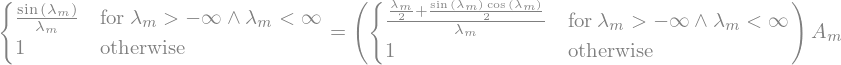

In [453]:
EQ4 = apply(_, refine, Q.nonzero(lambda_m) & Q.finite(lambda_m
) & Q.real(lambda_m) )
EQ4

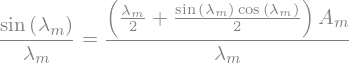

In [493]:
Eq(EQ4.lhs.as_expr_set_pairs()[0][0], 
EQ4.rhs.args[1].as_expr_set_pairs()[0][0] * EQ4.rhs.args[0])

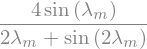

In [494]:
solve(_, Aix[m])[0].simplify()

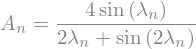

In [495]:
Eq(Aix[n], _.subs(lambda_m, lambda_n))

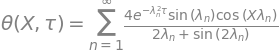

In [496]:
EQ1.replace(Aix[n], _.rhs)

In [497]:
SOL = _

### the lambda issue

In [604]:
def solve_at_Bi(Bi=2, Bi_solve=Bi_solve, lam=lam, SOL=SOL ):
    # print(Bi)
    # find lambdas based on Bi 
    initial_guesses = np.linspace(0, 1.5, 10)

    try:
        lambdas = np.array([nsolve(Bi_solve - Bi , lam, i) for i in initial_guesses])
    except:
        print(f" {Bi}, issue with solving for lamda")
        return None 

    n_terms = 10
    SOL_APPROX = sum([SOL.rhs.args[0].subs(lambda_n, lambdas[n]) for n in range(n_terms)])

    return SOL_APPROX
    
    

    

In [589]:
Bi_list = np.concatenate(
    [
    # np.linspace(0.01, 0.1, 10-1, endpoint=True),
    # np.linspace(0.2, 1, 10-1, endpoint=True),
    np.linspace(2, 10, 10-1, endpoint=True),
    # np.linspace(20, 100, 5, endpoint=True)
    ]
)


In [606]:
Bi_approx = [solve_at_Bi(Bi) for Bi in Bi_list] 

series = []
for approx, Bi in zip(Bi_approx, Bi_list):
    if approx:
        series.append((approx.subs(x,0), f"{np.round((1/Bi), 2)}"),  )


 5.0, issue with solving for lamda
 6.0, issue with solving for lamda


In [570]:
import plotly.express as px

In [572]:
print(PB.colorloop)

[]


In [573]:
PB.colorloop = px.colors.sequential.Plasma_r 

In [607]:
plot(*series, (tau, 0, 15), backend=PB, )

In [ ]:
Bi = 2
sols = np.array([nsolve(Bi_solve - Bi , lam, i) for i in initial_guesses])
np.unique(sols)

In [512]:
n_terms = 1
sum([SOL.rhs.args[0].subs(lambda_n, sols[n]) for n in range(n_terms)])

In [513]:
SOL_APPROX = _

In [510]:
SOL_APPROX.subs(x, 0)

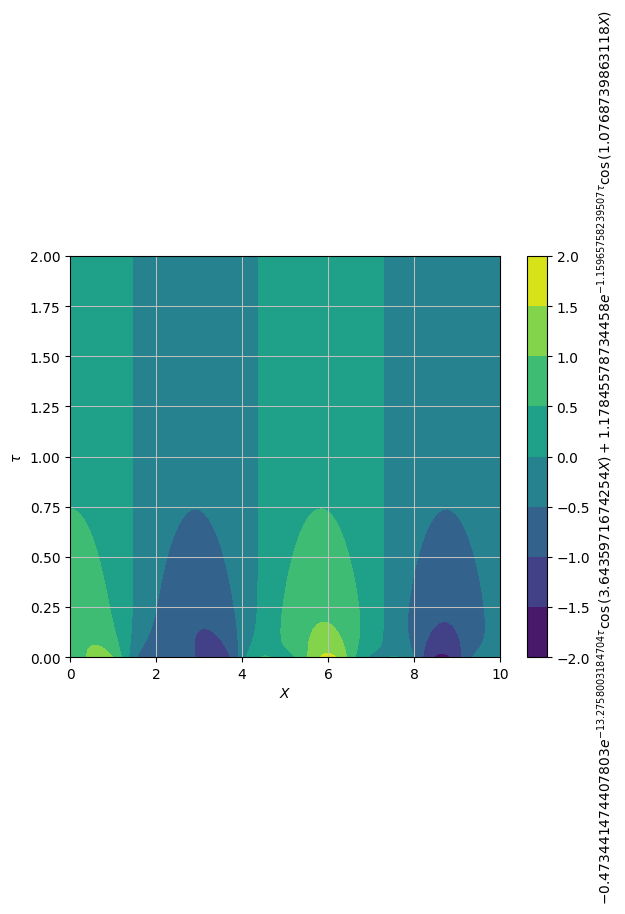

In [507]:
plot_contour(SOL_APPROX, (x, 0, 10 ), (tau, 0, 2))

In [ ]:
# for a give Bi (which is a property of the physics, lambda_n will be a constant?)

## short cut that is probs wrong

In [403]:
# short cut
lam_n = Indexed("lambda", n)
A_n = Indexed("A", n)
A_n

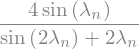

In [404]:
An_sol = (4*sin(lam_n))/(2*lam_n + sin(2*lam_n))
An_sol

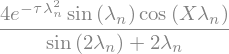

In [405]:
spec_sol = gen_eq2.rhs.subs([(lam, lam_n), (A, 1)])*An_sol
spec_sol

In [406]:
Bi_vals = np.linspace(0.1, 1, 10)
Bi_vals

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [407]:
Bi = 2
lam_bi2 = nsolve(Bi_solve - Bi , lam, 1)
lam_bi2

In [408]:
spec_sol_bi2 = spec_sol.subs(lam_n, lam_bi2)
spec_sol_bi2

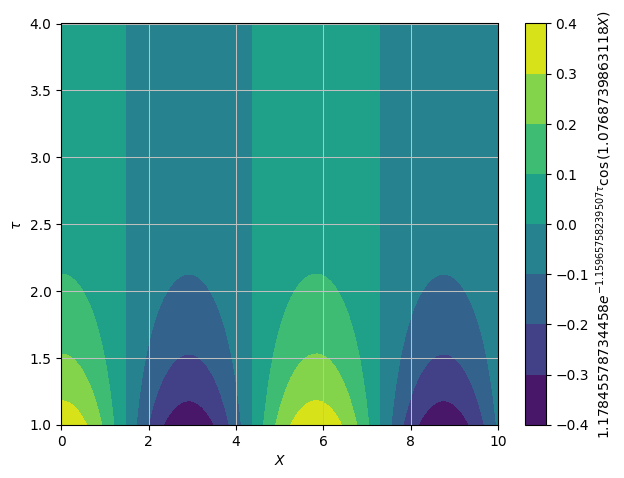

In [409]:
plot_contour(spec_sol_bi2, (x, 0, 10), (tau, 1,4))